In [1]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_orig = pd.read_csv('./data_vasochange/rl_original.csv')

In [3]:
###### getting the min, max, median for each vaso actions 

In [4]:
a = df_orig['max_dose_vaso'][df_orig['vc_ac'] == 1]

In [5]:
action1=[a.min(),a.max(),a.median()]

In [6]:
b = df_orig['max_dose_vaso'][df_orig['vc_ac'] == 2]

In [7]:
action2=[b.min(),b.max(),b.median()]

In [8]:
c = df_orig['max_dose_vaso'][df_orig['vc_ac'] == 3]

In [9]:
action3=[c.min(),c.max(),c.median()]

In [10]:
d = df_orig['max_dose_vaso'][df_orig['vc_ac'] == 4]

In [11]:
action4=[d.min(),d.max(),d.median()]

In [12]:
print(action1, action2,action3, action4)

[0.002, 0.079, 0.04] [0.08, 0.2, 0.135] [0.201, 0.449, 0.27] [0.45, 1.005, 0.7859999999999999]


In [13]:
df_train = pd.read_csv('./data_vasochange/train_withterm.csv')
df_train_orig = df_orig[df_orig['icustayid'].isin(df_train['icustayid'].unique())]
df_test = pd.read_csv('./data_vasochange/test_withterm.csv')
df_test_orig = df_orig[df_orig['icustayid'].isin(df_test['icustayid'].unique())]

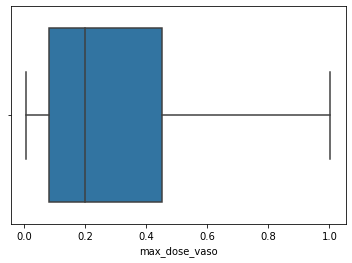

In [14]:
sns.boxplot(x= df_test_orig['max_dose_vaso'][df_test_orig['max_dose_vaso']>0])

In [15]:
######## df_test['abchange_vc'] is not the absolute change. it is the relative change######
abchange = df_test_orig['abchange_vc']
df_test['abchange_vc'] = np.array(abs(abchange))

In [108]:
agent_actions_test = pickle.load(open('/home/userfs/y/yj914/SepsisDeepRL1/dqn_normal/dqn_normal_actions_test.p', "rb" ))
agent_actions_test1 = pickle.load(open('/home/userfs/y/yj914/SepsisDeepRL1/vasochange4_dqn_normal/dqn_normal_actions_test.p', "rb" ))
#agent_actions_test1 = pickle.load(open('/shared/storage/cs/staffstore/yj914/yj914/SepsisDeepRL/vasochange2_dqn_normal/dqn_normal_actions_test.p', "rb" ))
#agent_actions_val = pickle.load(open('/home/userfs/y/yj914/SepsisDeepRL1/dqn_normal/dqn_normal_actions_val.p', "rb" ))
#agent_actions_train = pickle.load(open('/home/userfs/y/yj914/SepsisDeepRL1/dqn_normal/dqn_normal_actions_train.p', "rb"))

In [109]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [110]:
test_actions_arr = np.array([inv_action_map[i] for i in agent_actions_test])
test_actions_arr1 = np.array([inv_action_map[i] for i in agent_actions_test1])

In [111]:
df_test['agent_iv'] = test_actions_arr[:,0]
df_test['agent_vaso'] = test_actions_arr[:,1]
df_test['agent_iv1'] = test_actions_arr1[:,0]
df_test['agent_vaso1'] = test_actions_arr1[:,1]

In [112]:
df_test.head()

,bloc,icustayid,mortality_90d,MIMICzs1,MIMICzs2,MIMICzs3,MIMICzs4,MIMICzs5,MIMICzs6,MIMICzs7,...,abchange_vc,max_dose_vaso,agent_iv,agent_vaso,agent_iv1,agent_vaso1,agent_dose_vaso,agent_dose_vaso1,abchange_vc_agent,abchange_vc_agent1
0,1,47,0,-0.5,-0.5,-0.5,-2.302585,0.855691,-1.030949,0.513024,...,0.0,0.0,4,2,2,2,0.135,0.135,0.000,0.000
1,2,47,0,-0.5,-0.5,-0.5,-2.302585,0.855691,-1.030949,0.513024,...,0.0,0.0,4,0,2,2,0.000,0.786,0.135,0.651
2,9,47,0,-0.5,-0.5,-0.5,-2.302585,0.855691,-1.014956,-1.567879,...,0.0,0.0,4,2,2,1,0.135,0.135,0.135,0.651
3,1,66,0,-0.5,-0.5,-0.5,-2.302585,-0.067316,-0.107333,0.705956,...,0.0,0.0,4,2,2,1,0.135,0.000,0.000,0.000
4,2,66,0,-0.5,-0.5,-0.5,-2.302585,-0.067316,-0.107333,0.705956,...,0.0,0.0,1,0,1,1,0.000,0.000,0.135,0.000


In [113]:
action_dose_map = {0: 0, 1: action1[2], 2: action2[2], 3: action3[2], 4:action4[2]}

In [114]:
print(action_dose_map)

{0: 0, 1: 0.04, 2: 0.135, 3: 0.27, 4: 0.7859999999999999}


In [115]:
df_test['agent_dose_vaso'] = df_test['agent_vaso'].apply(lambda x:action_dose_map[x] )
df_test['agent_dose_vaso1'] = df_test['agent_vaso1'].apply(lambda x:action_dose_map[x])

In [116]:
df_test['abchange_vc_agent'] = 0 
for i in df_test.index:
        if i == 0:
            continue
        if df_test.loc[i, 'icustayid'] == df_test.loc[i-1, 'icustayid']:
            vaso_cur = df_test.loc[i, 'agent_dose_vaso']
            vaso_prev = df_test.loc[i-1, 'agent_dose_vaso']
            increase_rate = vaso_cur - vaso_prev
            df_test.loc[i, 'abchange_vc_agent'] = abs(increase_rate)

In [117]:
df_test['abchange_vc_agent1'] = 0 
for i in df_test.index:
        if i == 0:
            continue
        if df_test.loc[i, 'icustayid'] == df_test.loc[i-1, 'icustayid']:
            vaso_cur = df_test.loc[i, 'agent_dose_vaso1']
            vaso_prev = df_test.loc[i-1, 'agent_dose_vaso1']
            increase_rate = vaso_cur - vaso_prev
            df_test.loc[i, 'abchange_vc_agent1'] = abs(increase_rate)

In [118]:
comparision_test = df_test[['icustayid', 'abchange_vc', 'abchange_vc_agent', 'abchange_vc_agent1' ]]

In [119]:
comparision_test.head()

,icustayid,abchange_vc,abchange_vc_agent,abchange_vc_agent1
0,47,0.0,0.000,0.000
1,47,0.0,0.135,0.000
2,47,0.0,0.135,0.095
3,66,0.0,0.000,0.000
4,66,0.0,0.135,0.000


In [120]:
############# get max vaso change by agent action for each patient #################
df_grouped_agent = comparision_test.groupby('icustayid').agg({'abchange_vc_agent':'max'})
df_grouped_agent = df_grouped_agent.reset_index()
df_grouped_agent = df_grouped_agent.rename(columns={'abchange_vc_agent':'abchange_vc_agentmax'})

In [121]:
############# get max vaso change by agent1 action for each patient #################
df_grouped_agent1 = comparision_test.groupby('icustayid').agg({'abchange_vc_agent1':'max'})
df_grouped_agent1 = df_grouped_agent1.reset_index()
df_grouped_agent1 = df_grouped_agent1.rename(columns={'abchange_vc_agent1':'abchange_vc_agentmax1'})

In [122]:
############# get max vaso change by physician action for each patient #################
df_grouped_physician = comparision_test.groupby('icustayid').agg({'abchange_vc':'max'})
df_grouped_physician = df_grouped_physician.reset_index()
df_grouped_physician = df_grouped_physician.rename(columns = {'abchange_vc': 'abchange_vc_max'})

In [123]:
df_comparision = pd.merge(df_grouped_physician, df_grouped_agent, how = 'left', on=['icustayid'])
df_comparision1 = pd.merge(df_grouped_physician, df_grouped_agent1, how = 'left', on=['icustayid'])

In [124]:
df_comparision1.head()

,icustayid,abchange_vc_max,abchange_vc_agentmax1
0,47,0.000,0.095
1,66,0.000,0.135
2,78,0.338,0.040
3,109,0.050,0.270
4,135,0.000,0.040


In [125]:
agenthigher = []
for i in df_comparision.index:
    if df_comparision.ix[i, 'abchange_vc_max'] <= df_comparision.ix[i, 'abchange_vc_agentmax']:
        agenthigher.append(df_comparision.ix[i])
        

In [126]:
agenthigher1 = []
for i in df_comparision1.index:
    if df_comparision1.ix[i, 'abchange_vc_max'] <= df_comparision1.ix[i, 'abchange_vc_agentmax1']:
        agenthigher1.append(df_comparision1.ix[i])

In [127]:
ahigh = df_comparision[df_comparision['abchange_vc_agentmax'] >= action4[2]]

In [128]:
ahigh1 = df_comparision1[df_comparision1['abchange_vc_agentmax1'] >= action4[2]]

In [129]:
phigh = df_comparision1[df_comparision1['abchange_vc_max'] >= action4[2]]

In [130]:
print('In physician policy, the number of patients whose absolute change in one step is over 0.786 ', len(phigh))
print('In optimal policy, the number of patients whose absolute change in one step is over 0.786 ', len(ahigh))
print('In my modified policy, the number of patients whose absolute change in one step is over 0.786 ', len(ahigh1))
print('How many patients evaluated ', len(df_comparision))
print('In optimal policy, the NO. of patients absoluate change is higher than physician policy ',len(agenthigher))
print('In my modified policy, the NO. of patients absoluate change is higher than physician policy ',len(agenthigher1))



In physician policy, the number of patients whose absolute change in one step is over 0.786  57
In optimal policy, the number of patients whose absolute change in one step is over 0.786  756
In my modified policy, the number of patients whose absolute change in one step is over 0.786  170
How many patients evaluated  2160
In optimal policy, the NO. of patients absoluate change is higher than physician policy  1929
In my modified policy, the NO. of patients absoluate change is higher than physician policy  1835


In [131]:
df_comparision= df_comparision.sort_values(by=['abchange_vc_max', 'abchange_vc_agentmax'])
df_comparision1= df_comparision1.sort_values(by=['abchange_vc_max', 'abchange_vc_agentmax1'])

In [132]:
plot_value1 = np.array(df_comparision['abchange_vc_max']) 
plot_value2 = np.array(df_comparision['abchange_vc_agentmax'])

In [133]:
plot_value11 = np.array(df_comparision1['abchange_vc_max']) 
plot_value12 = np.array(df_comparision1['abchange_vc_agentmax1'])

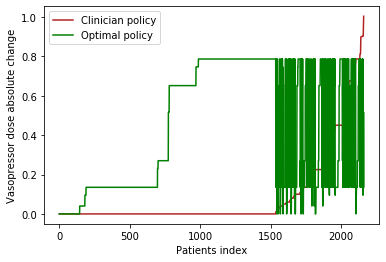

In [149]:
plt.plot(plot_value1, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_value2, 'green',label = 'Optimal policy') 
plt.xlabel('Patients index')
plt.ylabel('Vasopressor dose absolute change')
plt.legend()
plt.show()

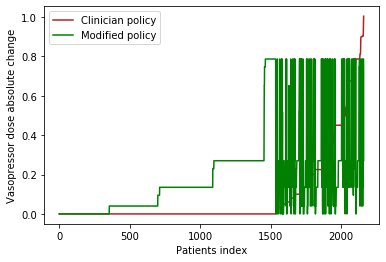

In [150]:
plt.plot(plot_value11, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_value12, 'g',label = 'Modified policy') 
plt.xlabel('Patients index')
plt.ylabel('Vasopressor dose absolute change')
plt.legend()
plt.show()

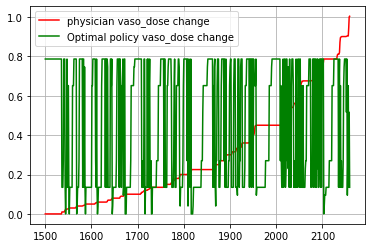

In [92]:
dim = np.arange(1500,2160,1)
plt.plot(dim, plot_value1[1500:], 'r', label = 'physician vaso_dose change') 
plt.plot(dim, plot_value2[1500:], 'g', label = 'Optimal policy vaso_dose change') 
plt.legend()
plt.grid()
plt.show()


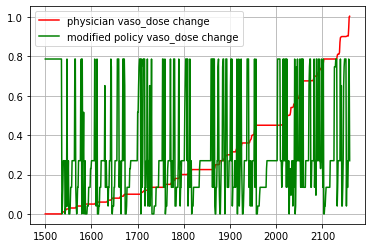

In [93]:
dim = np.arange(1500,2160,1)
plt.plot(dim, plot_value11[1500:], 'r', label = 'physician vaso_dose change') 
plt.plot(dim, plot_value12[1500:], 'g', label = 'modified policy vaso_dose change') 
plt.legend()
plt.grid()
plt.show()

In [94]:
x = plot_value1[1500:]
y = plot_value2[1500:]
### among x and y, there are 302 cases among (302 + 252 + 11) where agent dose change is higher than physician's #####

In [95]:
df_comparision3= df_comparision.sort_values(by=['abchange_vc_agentmax', 'abchange_vc_max'])
df_comparision4= df_comparision1.sort_values(by=['abchange_vc_agentmax1', 'abchange_vc_max'])

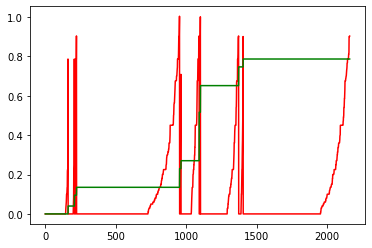

In [96]:
plot_value3 = np.array(df_comparision3['abchange_vc_max']) 
plot_value4 = np.array(df_comparision3['abchange_vc_agentmax'])
plt.plot(plot_value3, 'r') 
plt.plot(plot_value4, 'g') 
plt.show()

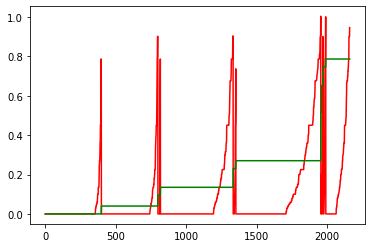

In [97]:
plot_value13 = np.array(df_comparision4['abchange_vc_max']) 
plot_value14 = np.array(df_comparision4['abchange_vc_agentmax1'])
plt.plot(plot_value13, 'r') 
plt.plot(plot_value14, 'g') 
plt.show()
